In [274]:
#Downloading necessary libraries to start with time series analysis

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels as statsmodels
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [275]:
ar1 = np.array([1,- 0.5])
ma1 = np.array([1, 0, 0.25])
plt.rcParams['figure.figsize'] = [10, 7.5]


In [276]:
ARMA_1 = ArmaProcess(ar1,ma1).generate_sample(nsample=1000)

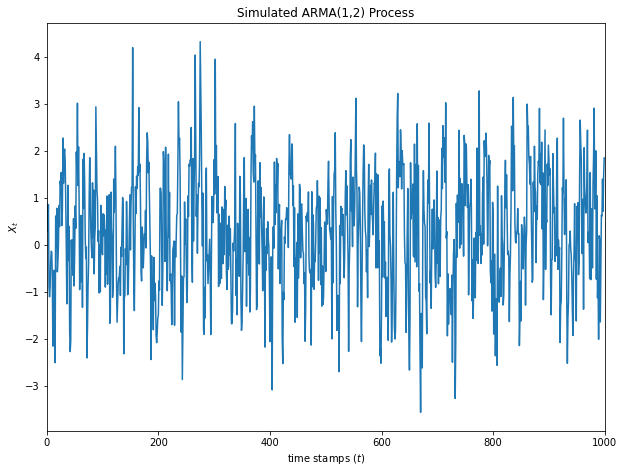

In [277]:
plt.plot(ARMA_1)
plt.title('Simulated ARMA(1,2) Process')
plt.xlim([0,1000])
plt.ylabel("$X_t$")
plt.xlabel("time stamps $(t)$")
plt.show()

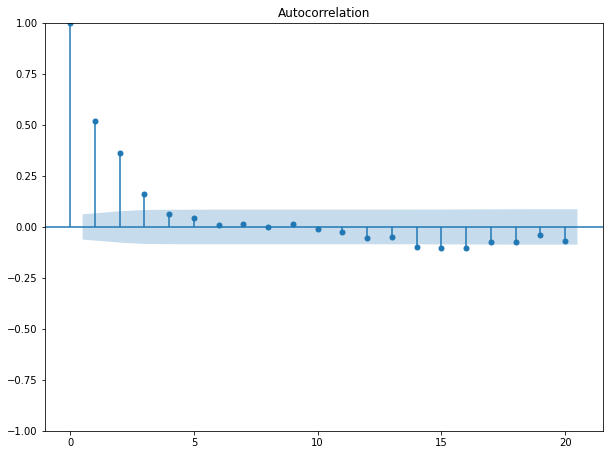

In [278]:
plot_acf(ARMA_1, lags =20)
plt.show()

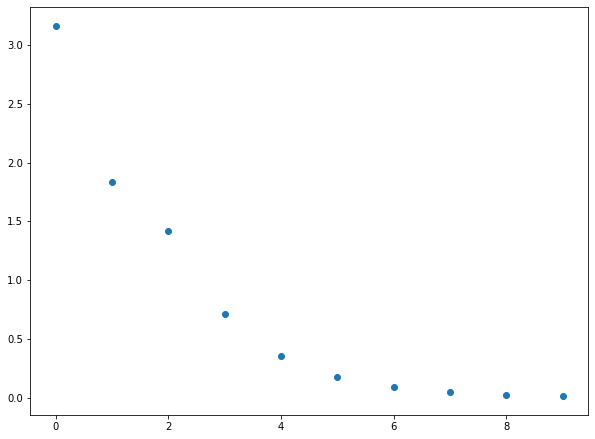

In [279]:
acvf = statsmodels.tsa.arima_process.arma_acovf(ar1, ma1, nobs=10, sigma2=2, dtype=None)
plt.scatter(range(len(acvf)),acvf)
plt.show()

Autocorrelation

In [280]:
acvf/acvf[0]

array([1.        , 0.57894737, 0.44736842, 0.22368421, 0.11184211,
       0.05592105, 0.02796053, 0.01398026, 0.00699013, 0.00349507])

Autocorrelation estimate

In [281]:
acv_setimate = statsmodels.tsa.stattools.acf(ARMA_1, nlags=20 )


In [292]:
steps = np.array([1, 10, 100, 1000, 10000, 100000, 1000000])
ARMA_1 = ArmaProcess(ar1,ma1).generate_sample(nsample=1000)
acv_theory = np.array( statsmodels.tsa.arima_process.arma_acovf(ar1, ma1, nobs=21, sigma2=2, dtype=None))
acv_theory = acv_theory/acv_theory[0]
autocorr_rmse = []
for i in steps:
    temp_autocor =0
    for j in range(i):
        temp_autocor += statsmodels.tsa.stattools.acf(ARMA_1, nlags=20 )
    avg_tempautocor = temp_autocor/i
    autocorr_rmsetemp = np.linalg.norm(avg_tempautocor - acv_theory) / np.sqrt(len(acv_theory))  
    autocorr_rmse.append(autocorr_rmsetemp)

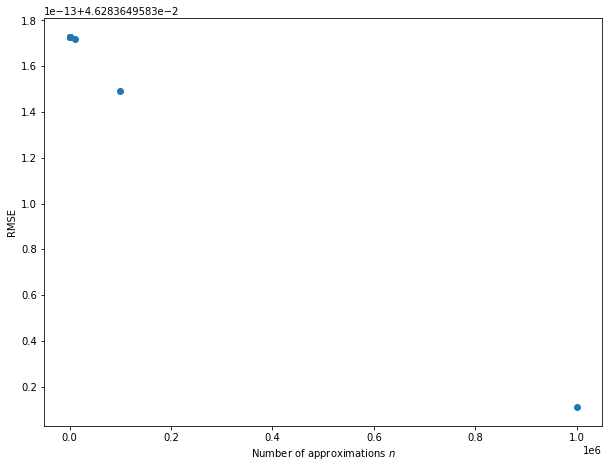

In [333]:
plt.scatter(steps, autocorr_rmse)
plt.xlabel("Number of approximations $n$")
plt.ylabel("RMSE")
plt.show()

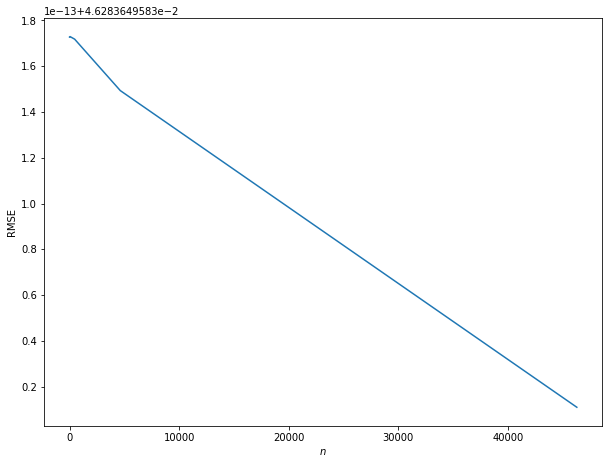

In [343]:
#Performing regression using polyfit
coeffs = np.polyfit(1/np.sqrt(steps),autocorr_rmse, deg = 1)
coeffs

#Plotting
plt.plot(coeffs[0]+coeffs[1]*steps, autocorr_rmse)
plt.xlabel("$n$")
plt.ylabel("RMSE")
plt.show()